# **Image Data - Recognising Handwritten Alphabets**

DATA SET LINK : https://drive.google.com/file/d/1n1fm264LGSeRGLtJIiY5NXRVMsMrQCMH/view?usp=sharing

**Downloaded the file and uploaded into google drive**

In [ ]:
# MOUNTING GOOGLE DRIVE TO COLAB
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive





*   Mounted the google drive to colab in order to access our required dataset.
*   As it is a zip file we need to extract that
*   We can extract the file in google colab itself








In [ ]:
# we can unzip the file in below two methods... I'm storing the extracted data into colab local folder named 'sanju' 
! unzip '/content/gdrive/MyDrive/mnist.zip' -d '/content/sample'

# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/mnist.zip', 'r') as zip_ref:
   # zip_ref.extractall('/content/sanju')
# Note- when we store the data in local folder it won't be available for next session so i'm doing this in a single strech till making of dataframe and saved in a csv file which we can use further.

Streaming output truncated to the last 5000 lines.
 extracting: /content/sanju/New folder/Z/Z-1967.png  
 extracting: /content/sanju/New folder/Z/Z-1968.png  
 extracting: /content/sanju/New folder/Z/Z-1969.png  
  inflating: /content/sanju/New folder/Z/Z-197.png  
 extracting: /content/sanju/New folder/Z/Z-1970.png  
 extracting: /content/sanju/New folder/Z/Z-1971.png  
 extracting: /content/sanju/New folder/Z/Z-1972.png  
  inflating: /content/sanju/New folder/Z/Z-1973.png  
 extracting: /content/sanju/New folder/Z/Z-1974.png  
 extracting: /content/sanju/New folder/Z/Z-1975.png  
 extracting: /content/sanju/New folder/Z/Z-1976.png  
  inflating: /content/sanju/New folder/Z/Z-1977.png  
 extracting: /content/sanju/New folder/Z/Z-1978.png  
 extracting: /content/sanju/New folder/Z/Z-1979.png  
 extracting: /content/sanju/New folder/Z/Z-198.png  
 extracting: /content/sanju/New folder/Z/Z-1980.png  
 extracting: /content/sanju/New folder/Z/Z-1981.png  
 extracting: /content/sanju/New f

In [ ]:
import os

In [ ]:
    for i in range(65,91):
      size = len(os.listdir('/content/sample/New folder/'+chr(i)))
      print(chr(i),':',size)

A : 13870
B : 8668
C : 23409
D : 10134
E : 11440
F : 1163
G : 5762
H : 7218
I : 1120
J : 8493
K : 5603
L : 11586
M : 12336
N : 19010
O : 57825
P : 19341
Q : 5812
R : 11566
S : 48419
T : 22495
U : 29008
V : 4182
W : 10784
X : 6272
Y : 10859
Z : 6076


In [ ]:
from PIL import Image
import os
from os import listdir
import numpy as np
import pandas as pd




 

directory = "/content/sample/New folder"
image = []
label = []
for item in os.listdir(directory):
  folder_dir = os.path.join(directory, item)
# get the path/directory

  for i in os.listdir(folder_dir):
       img = Image.open(os.path.join(folder_dir, i))
       image.append(img) # list contains all images
       label.append(i[0]) # contains lables of each image


In [ ]:
image

[<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDF799C10>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CEEF0B820>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB730>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB670>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB760>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB7C0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB820>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB880>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB8E0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB940>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBB9A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F7CDDBBBA00>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7

### Cheking the dimensions - before cleaning

In [ ]:
np.array(image[0]).shape
np.array(image[0]).size

784

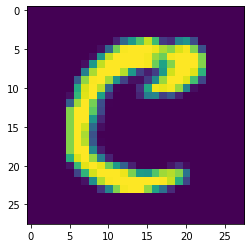

In [ ]:
# image before resizing
import matplotlib.pyp3lot as plt
plt.imshow(image[0])

### Resizing Image using Thumbnail

> In order to decrease the Dimensionality of image i am resizing the image which leads to decrease in pixcel size



In [ ]:
# resizing
img_resized=[]
for i in image:
   i.thumbnail((15,15))
   img_resized.append(i)

In [ ]:
 img_resized

[<PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDF799C10>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CEEF0B820>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB730>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB670>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB760>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB7C0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB820>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB880>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB8E0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB940>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBB9A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7F7CDDBBBA00>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=15x15 at 0x7

In [ ]:
np.array(img_resized[0]).size
  

225

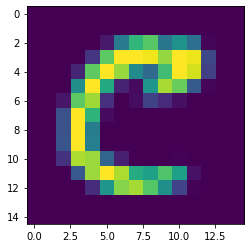

In [ ]:
# image after resizing
import matplotlib.pyplot as plt
plt.imshow(img_resized[0])

## Converting **image data** to **Numpy array** and again **flattening** the data inorder to make a **dataframe**

In [ ]:
l=[]
for i in img_resized:
  l.append(list(np.array(i).ravel())) 


In [ ]:
mnist_df = pd.DataFrame(l)
mnist_df["label"] = label


In [ ]:
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C


In [ ]:
# Converting the data frame into CSV file and saving it in Google Drive to use further
mnist_df.to_csv("/content/drive/MyDrive/mnistcleaned.csv")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mnistcleaned.csv')

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C


In [ ]:
df.shape

(372451, 227)

### Dropping the Extra Column i.e.['Unnamed: 0']

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C


In [ ]:
df.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

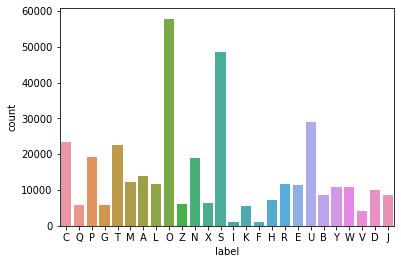

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='label')

Note - From Above graph we can observe that there is lot of imbalance data present in the given data

# Checking Duplicates

In [ ]:
df.duplicated().value_counts()

False    201096
True     171355
dtype: int64

Here I'm not dropping Duplicates in Data frame because it leads to huge Data loss

### **Seggrigating The Input(X) and Output(Targer Variable-y)**

In [ ]:
X = df.drop('label', axis=1)

y = df['label']

### Printing random images with thier labels

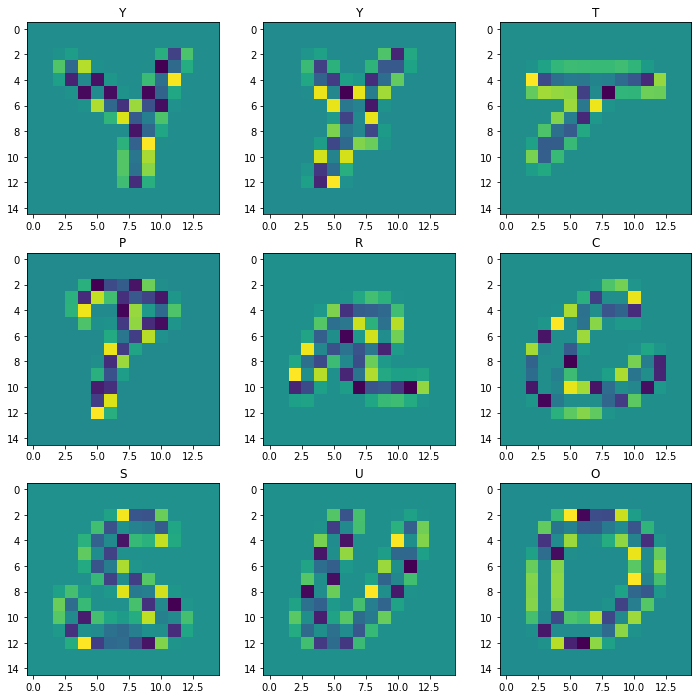

In [ ]:
# printing the random images(alphabets) in the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
idx = np.random.randint(0,372450 , 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (15,15))
    plt.imshow(img_grid)

### **Split Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

# **LOGISTIC REGRESSION**



### **Training**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **Prediction**

In [ ]:
y_test_pred = classifier.predict(X_test)

## **Measuring Performance** -
### **Accuracy**

In [ ]:
# calculate accuracy of class predictions

from sklearn import metrics

LogisticRegression_score=metrics.accuracy_score(y_test, y_test_pred)
LogisticRegression_score

0.35628752161352334

## **Confusion Matrix - Heat Map**

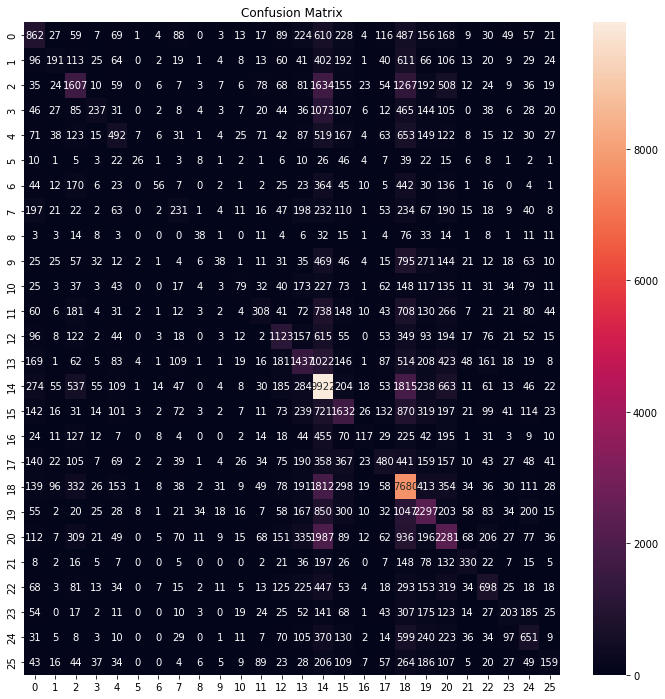

In [ ]:
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,12))
sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()



## **Precision, Recall and F1 Score**

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.30      0.25      0.28      3398
           B       0.31      0.09      0.14      2150
           C       0.38      0.27      0.31      5924
           D       0.41      0.09      0.15      2554
           E       0.30      0.18      0.22      2782
           F       0.46      0.09      0.16       276
           G       0.42      0.04      0.07      1425
           H       0.25      0.13      0.17      1792
           I       0.29      0.13      0.18       298
           J       0.24      0.02      0.03      2148
           K       0.25      0.06      0.09      1388
           L       0.33      0.10      0.16      2943
           M       0.42      0.36      0.39      3130
           N       0.32      0.30      0.31      4744
           O       0.39      0.68      0.49     14669
           P       0.33      0.33      0.33      4911
           Q       0.38      0.08      0.13      1458
           R       0.30    

# **DECISION TREE CLASSIFIER**

In [ ]:
#Training
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#Prediction
y_test_pred = dt_classifier.predict(X_test)



## **Accuracy**

In [ ]:
DecisionTree_score=metrics.accuracy_score(y_test, y_test_pred)
DecisionTree_score

0.9286887974826287

### **Confusion Matrix - Heat Map**

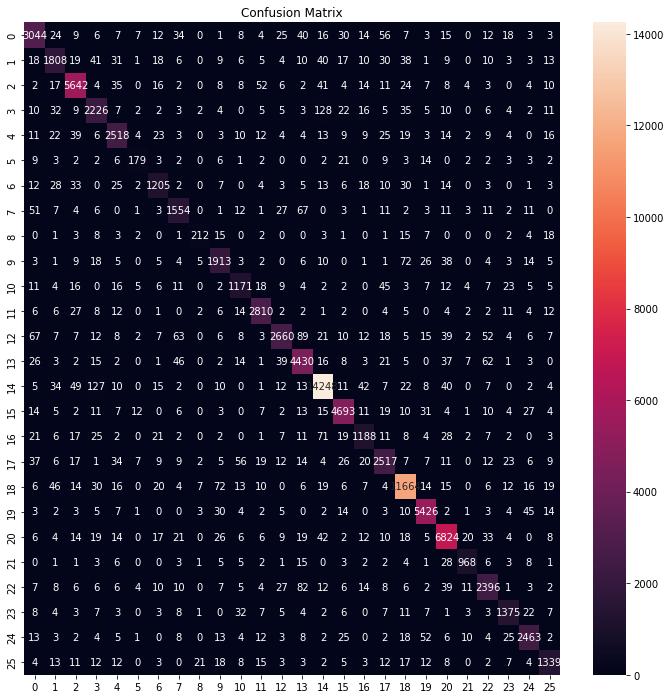

In [ ]:
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,12))
sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## **Precision, Recall and F1 Score**

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.90      0.90      0.90      3398
           B       0.86      0.84      0.85      2150
           C       0.95      0.95      0.95      5924
           D       0.86      0.87      0.86      2554
           E       0.90      0.91      0.90      2782
           F       0.78      0.65      0.71       276
           G       0.86      0.85      0.85      1425
           H       0.86      0.87      0.86      1792
           I       0.83      0.71      0.77       298
           J       0.88      0.89      0.89      2148
           K       0.84      0.84      0.84      1388
           L       0.93      0.95      0.94      2943
           M       0.93      0.85      0.89      3130
           N       0.91      0.93      0.92      4744
           O       0.97      0.97      0.97     14669
           P       0.95      0.96      0.95      4911
           Q       0.85      0.81      0.83      1458
           R       0.88    

# **RANDOM FOREST CLASSIFIER**






In [ ]:
# Training
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

#Prediction
y_test_pred = classifier.predict(X_test)



### **Accuracy**

In [ ]:
RandomForestClassifier_score=metrics.accuracy_score(y_test, y_test_pred)
RandomForestClassifier_score

0.9765446285695875

### **Confusion Matrix - Heat Map**

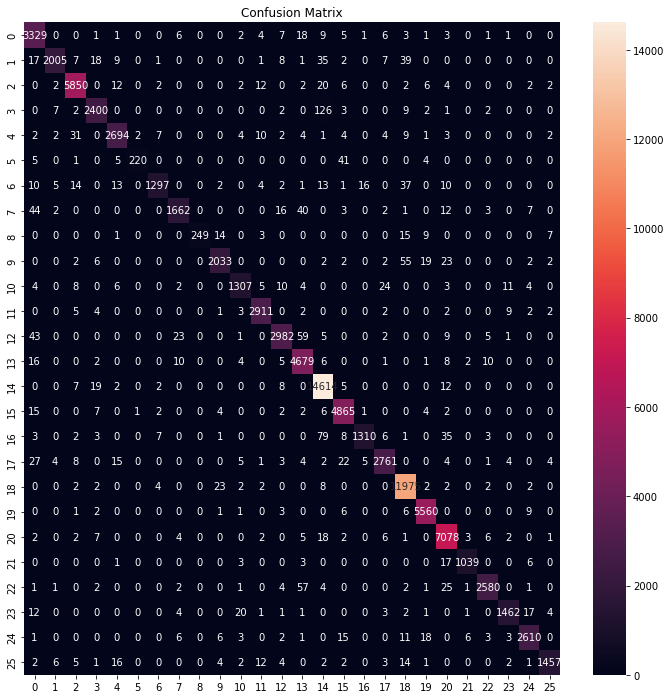

In [ ]:
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,12))
sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## **Precision, Recall and F1 Score**

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.94      0.98      0.96      3398
           B       0.99      0.93      0.96      2150
           C       0.98      0.99      0.99      5924
           D       0.97      0.94      0.95      2554
           E       0.97      0.97      0.97      2782
           F       0.99      0.80      0.88       276
           G       0.98      0.91      0.94      1425
           H       0.97      0.93      0.95      1792
           I       1.00      0.84      0.91       298
           J       0.97      0.95      0.96      2148
           K       0.96      0.94      0.95      1388
           L       0.98      0.99      0.98      2943
           M       0.97      0.95      0.96      3130
           N       0.96      0.99      0.97      4744
           O       0.98      1.00      0.99     14669
           P       0.97      0.99      0.98      4911
           Q       0.98      0.90      0.94      1458
           R       0.98    

# **OTHER ALGORITHMS**

In [ ]:
# ADA BOOST

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

AdaBoostClassifier_score=metrics.accuracy_score(y_test, y_test_pred)


#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.46      0.40      0.43      3398
           B       0.38      0.37      0.37      2150
           C       0.47      0.59      0.52      5924
           D       0.44      0.36      0.40      2554
           E       0.49      0.45      0.47      2782
           F       0.39      0.51      0.45       276
           G       0.56      0.10      0.17      1425
           H       0.38      0.16      0.23      1792
           I       0.50      0.53      0.51       298
           J       0.32      0.17      0.23      2148
           K       0.50      0.43      0.46      1388
           L       0.41      0.35      0.38      2943
           M       0.53      0.57      0.55      3130
           N       0.40      0.49      0.44      4744
           O       0.70      0.64      0.67     14669
           P       0.61      0.51      0.56      4911
           Q       0.45      0.31      0.37      1458
           R       0.39    

In [ ]:
AdaBoostClassifier_score

0.5375296682525533

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

KNN_score=metrics.accuracy_score(y_test, y_test_pred)
KNN_score


0.5823354418824439

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.63      0.39      0.48      3398
           B       0.63      0.05      0.10      2150
           C       0.46      0.79      0.58      5924
           D       0.63      0.16      0.26      2554
           E       0.55      0.23      0.32      2782
           F       0.63      0.26      0.37       276
           G       0.56      0.13      0.21      1425
           H       0.47      0.32      0.38      1792
           I       0.84      0.21      0.33       298
           J       0.28      0.50      0.35      2148
           K       0.49      0.20      0.29      1388
           L       0.26      0.88      0.40      2943
           M       0.83      0.53      0.65      3130
           N       0.47      0.65      0.55      4744
           O       0.81      0.77      0.79     14669
           P       0.57      0.75      0.65      4911
           Q       0.76      0.07      0.12      1458
           R       0.61    

In [ ]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)

GradientBoostingClassifier_score=metrics.accuracy_score(y_test, y_test_pred)
GradientBoostingClassifier_score



0.896233608626078

In [ ]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           A       0.81      0.87      0.84      3398
           B       0.89      0.83      0.86      2150
           C       0.92      0.93      0.92      5924
           D       0.84      0.74      0.79      2554
           E       0.88      0.86      0.87      2782
           F       0.84      0.69      0.76       276
           G       0.89      0.78      0.83      1425
           H       0.81      0.72      0.77      1792
           I       0.88      0.69      0.77       298
           J       0.82      0.79      0.80      2148
           K       0.79      0.75      0.77      1388
           L       0.91      0.94      0.93      2943
           M       0.91      0.91      0.91      3130
           N       0.85      0.88      0.86      4744
           O       0.93      0.97      0.95     14669
           P       0.90      0.93      0.91      4911
           Q       0.87      0.75      0.81      1458
           R       0.84    

In [ ]:
import pandas as pd
import numpy as np

# **Final Results**

> Making data frame which consists all algorithms scores which we calculated



In [ ]:
Results = pd.DataFrame({"Algorithm": ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier",
                                     "AdaBoostClassifier","KNNClassifier","GBDTClassifier"],
                    "Accuracy_Score": [LogisticRegression_score, DecisionTree_score, RandomForestClassifier_score,
                                       AdaBoostClassifier_score, KNN_score,GradientBoostingClassifier_score],
                        "Precision_Score": [LogisticRegression_pscore, DecisionTree_pscore, RandomForestClassifier_pscore,
                                       AdaBoostClassifier_pscore, KNN_pscore,GradientBoostingClassifier_pscore],
                        "F1_Score": [LogisticRegression_score, DecisionTree_score, RandomForestClassifier_score,
                                       AdaBoostClassifier_fscore, KNN_fscore,GradientBoostingClassifier_fscore]})

In [ ]:
# sorting algorithms based on their accuracy scores in descending order

Results.sort_values(by="Accuracy_Score", ascending=False,ignore_index=True)

,Algorithm,Accuracy_Score,Precision_Score,F1_Score
0,RandomForestClassifier,0.976545,0.980000,0.976545
1,DecisionTreeClassifier,0.928689,0.928689,0.928689
2,GBDTClassifier,0.896234,0.900000,0.900000
3,KNNClassifier,0.582335,0.650000,0.560000
4,AdaBoostClassifier,0.537530,0.540000,0.530000
5,LogisticRegression,0.356288,0.350000,0.356288


<Figure size 5000x2000 with 0 Axes>

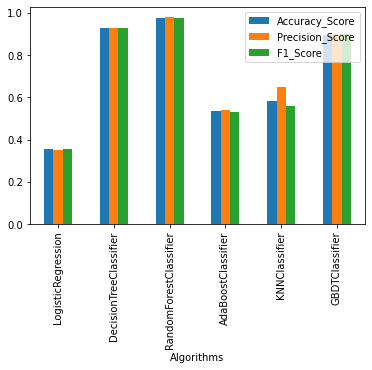

In [ ]:
plt.figure(figsize=(50,20), dpi = 100)
Results.plot(kind='bar')
position = np.arange(len(Results.Algorithm))
plt.xticks(position, ["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier","AdaBoostClassifier","KNNClassifier","GBDTClassifier"])
plt.xlabel('Algorithms',fontsize = 10, color = 'black')
plt.legend(loc = 'best')

# Conclusions

* Given Dataset has imbalance Data, Alphabets like ‘O’ and ‘S’ are having major Percentage of Data
* GBDT Classifier is taking too much time to train the model whereas KNN  Classifier is taking much time in predicting the data
* Good Performers: Random Forest Classifier, Decision tree classifier, and GBDT classifier 
* Bad Performers: KNN classifier, ADA boost Classifier, and Logistic Regression
* Best Algorithm: **Random Forest classifier** at **97.6%** accuracy